In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)), # CIFAR-10 images
    layers.Dense(256, activation='relu'),    # Hidden layer
    layers.Dense(10, activation='softmax')   # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Train the model
start_time = time.time()  # Start timing
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_test, y_test), verbose=2)
end_time = time.time()    # End timing

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/100
782/782 - 13s - 17ms/step - accuracy: 0.3191 - loss: 1.9152 - val_accuracy: 0.3623 - val_loss: 1.7760
Epoch 2/100
782/782 - 11s - 14ms/step - accuracy: 0.3840 - loss: 1.7274 - val_accuracy: 0.3976 - val_loss: 1.6815
Epoch 3/100
782/782 - 11s - 14ms/step - accuracy: 0.4075 - loss: 1.6646 - val_accuracy: 0.4234 - val_loss: 1.6328
Epoch 4/100
782/782 - 11s - 14ms/step - accuracy: 0.4190 - loss: 1.6331 - val_accuracy: 0.4226 - val_loss: 1.6174
Epoch 5/100
782/782 - 21s - 26ms/step - accuracy: 0.4296 - loss: 1.6039 - val_accuracy: 0.4199 - val_loss: 1.6145
Epoch 6/100
782/782 - 21s - 26ms/step - accuracy: 0.4385 - loss: 1.5812 - val_accuracy: 0.4420 - val_loss: 1.5853
Epoch 7/100
782/782 - 11s - 14ms/step - accuracy: 0.4450 - loss: 1.5646 - val_accuracy: 0.4429 - val_loss: 1.5638
Epoch 8/100
782/782 - 21s - 26ms/step - accuracy: 0.4504 - loss: 1.5468 - val_accuracy: 0.4276 - val_loss: 1.5890
Epoch 9/100
782/782 - 20s - 26ms/step - accuracy: 0.4574 - loss: 1.5293 - val_accuracy: 

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.5718
Test Accuracy: 0.4731


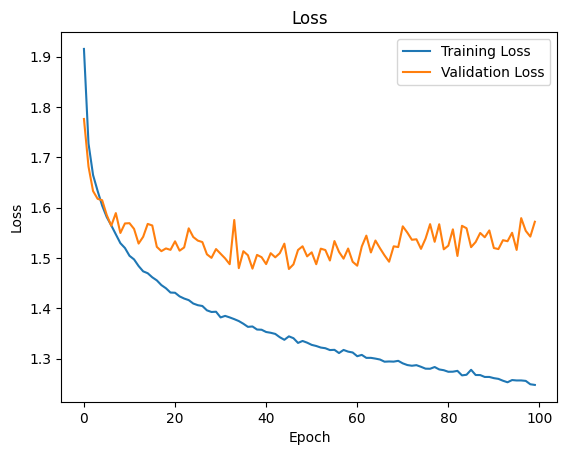

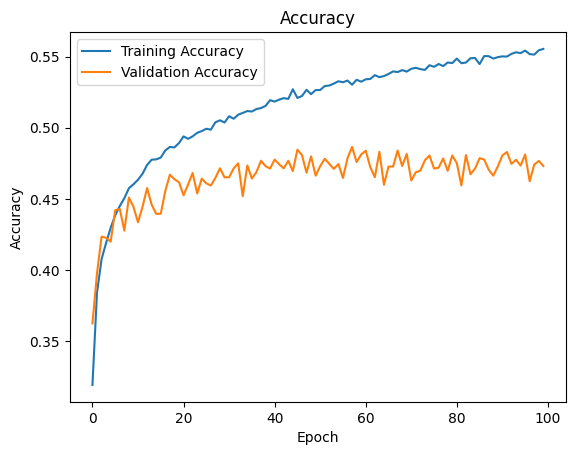

In [9]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Define the extended model with two additional hidden layers
extended_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten CIFAR-10 images
    layers.Dense(256, activation='relu'),    # First hidden layer
    layers.Dense(128, activation='relu'),    # Second hidden layer
    layers.Dense(64, activation='relu'),     # Third hidden layer
    layers.Dense(10, activation='softmax')   # Output layer for 10 classes
])

# Compile the extended model
extended_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [11]:
# Train the extended model
start_time = time.time()  # Start timing
extended_history = extended_model.fit(x_train, y_train, epochs=100, batch_size=64,
                                      validation_data=(x_test, y_test), verbose=2)
end_time = time.time()    # End timing

# Calculate training time
extended_training_time = end_time - start_time
print(f"Extended Model Training Time: {extended_training_time:.2f} seconds")

Epoch 1/100
782/782 - 13s - 17ms/step - accuracy: 0.3226 - loss: 1.8757 - val_accuracy: 0.3918 - val_loss: 1.6942
Epoch 2/100
782/782 - 11s - 14ms/step - accuracy: 0.3976 - loss: 1.6803 - val_accuracy: 0.4210 - val_loss: 1.6251
Epoch 3/100
782/782 - 11s - 14ms/step - accuracy: 0.4229 - loss: 1.6091 - val_accuracy: 0.4440 - val_loss: 1.5504
Epoch 4/100
782/782 - 11s - 15ms/step - accuracy: 0.4472 - loss: 1.5475 - val_accuracy: 0.4402 - val_loss: 1.5459
Epoch 5/100
782/782 - 21s - 26ms/step - accuracy: 0.4599 - loss: 1.5106 - val_accuracy: 0.4631 - val_loss: 1.5160
Epoch 6/100
782/782 - 11s - 14ms/step - accuracy: 0.4718 - loss: 1.4747 - val_accuracy: 0.4603 - val_loss: 1.5022
Epoch 7/100
782/782 - 11s - 14ms/step - accuracy: 0.4815 - loss: 1.4470 - val_accuracy: 0.4877 - val_loss: 1.4570
Epoch 8/100
782/782 - 12s - 16ms/step - accuracy: 0.4926 - loss: 1.4238 - val_accuracy: 0.4755 - val_loss: 1.4754
Epoch 9/100
782/782 - 12s - 15ms/step - accuracy: 0.4992 - loss: 1.3976 - val_accuracy: 

In [12]:
# Evaluate the extended model
test_loss, test_accuracy = extended_model.evaluate(x_test, y_test, verbose=0)
print(f"Extended Model Test Loss: {test_loss:.4f}")
print(f"Extended Model Test Accuracy: {test_accuracy:.4f}")

Extended Model Test Loss: 1.9097
Extended Model Test Accuracy: 0.4839


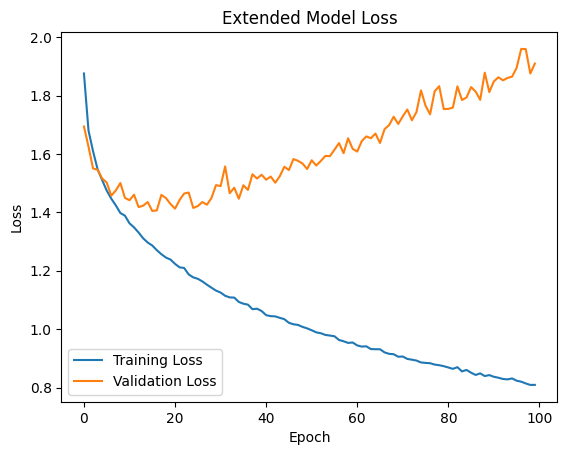

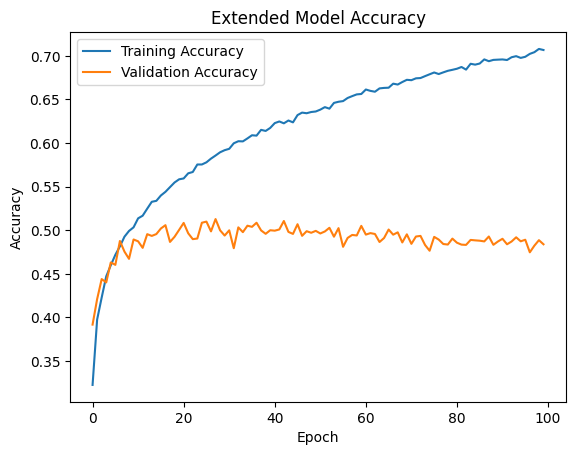

In [13]:
# Plot training & validation loss
plt.plot(extended_history.history['loss'], label='Training Loss')
plt.plot(extended_history.history['val_loss'], label='Validation Loss')
plt.title('Extended Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(extended_history.history['accuracy'], label='Training Accuracy')
plt.plot(extended_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Extended Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()